# Movie Analysis

> Hypothetical Situation: Microsoft wants to start a movie film company. 

>> Using the data provided below I will provide analysis and reccomendations on the best types of films to make going forward. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load & Review Data

Imported df_bom_gross to review data:

In [2]:
df_bom_gross = pd.read_csv('data/bom.movie_gross.csv.gz')
df_bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [96]:
df_bom_gross.info()
df_bom_gross.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Noticed a large number of nans in 'foreign_gross' column, so decided to drop the column from the dataframe:

In [3]:
df_bom_gross.drop(columns=['foreign_gross'], inplace=True)

Sorted df_bom_gross by 'domestic_gross' column to review top performing films:

In [4]:
df_bom_gross.sort_values(by='domestic_gross',ascending=False).head()

,title,studio,domestic_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,2015
3080,Black Panther,BV,700100000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,2018
1873,Jurassic World,Uni.,652300000.0,2015
727,Marvel's The Avengers,BV,623400000.0,2012


# Load & Review Data

Imported df_title_basics to review data:

In [5]:
df_title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
df_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [33]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Dropped 'runtime_minutes' column due to large number of nans:

In [6]:
df_title_basics.drop(columns=['runtime_minutes'], inplace=True)

Converted genres column from object to string in order to merge with other dataframes:

In [7]:
df_title_basics['genres'] = df_title_basics.genres.astype(str)

Changed name of 'primary_title' column to 'title' in order to merge column with other dataframes:

In [8]:
df_title_basics.rename(columns={'primary_title':'title'}, inplace=True)

# Load & Review Data

Imported df_title_ratings to review data:

In [9]:
df_title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
df_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Merge Data

Merged column 'tconst' between df_title_basics and df_title_ratings in order to create a new dataframe combining the data from both. Then sorted the new merged_basics_and_ratings dataframe by the 'averagerating' column in order to review the highest rated films:

In [10]:
merged_basics_and_ratings = pd.merge(df_title_basics, df_title_ratings, on=['tconst'], how='inner')
merged_basics_and_ratings.sort_values(by='averagerating',ascending=False).head()

,tconst,title,original_title,start_year,genres,averagerating,numvotes
51109,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,Documentary,10.0,7
65944,tt7259300,Calamity Kevin,Calamity Kevin,2019,"Adventure,Comedy",10.0,6
71577,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,Documentary,10.0,5
73616,tt9715646,Renegade,Renegade,2019,Documentary,10.0,20
65755,tt7227500,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,"Documentary,History",10.0,6


In [77]:
merged_basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Sorted new merged_basics_and_ratings dataframe by top 50 number of votes, creating new df4, then sorted by 'average rating' where 'numvotes' column is greater than 50,000 creating new df5. df5 will now show the top 50 highest 'averagerating' with more then 50,000 votes. This will help to see if there is a correlation between the top performing films and films with the highest rating: 

In [11]:
df4 = merged_basics_and_ratings.sort_values(by='numvotes',ascending=False).head(50)
df5 = df4[df4['numvotes'] > 50000].sort_values(by='averagerating',ascending=False)

In [34]:
df5.head()

,tconst,title,original_title,start_year,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
280,tt0816692,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
26774,tt2582802,Whiplash,Whiplash,2014,"Drama,Music",8.5,616916
43419,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926
7125,tt1675434,The Intouchables,Intouchables,2011,"Biography,Comedy,Drama",8.5,677343


Joined df5 with the previouse dataframe df_bom_gross along the 'title' column in order to combine all the data into one dataframe to review:  

In [12]:
joined_df = pd.merge(df5, df_bom_gross, on=['title'], how='inner')
joined_df.head()

,tconst,title,original_title,start_year,genres,averagerating,numvotes,studio,domestic_gross,year
0,tt1375666,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,WB,292600000.0,2010
1,tt0816692,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,Par.,188000000.0,2014
2,tt2582802,Whiplash,Whiplash,2014,"Drama,Music",8.5,616916,SPC,13100000.0,2014
3,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,BV,678800000.0,2018
4,tt1853728,Django Unchained,Django Unchained,2012,"Drama,Western",8.4,1211405,Wein.,162800000.0,2012


In [64]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          45 non-null     object 
 1   title           45 non-null     object 
 2   original_title  45 non-null     object 
 3   start_year      45 non-null     int64  
 4   genres          45 non-null     object 
 5   averagerating   45 non-null     float64
 6   numvotes        45 non-null     int64  
 7   studio          45 non-null     object 
 8   domestic_gross  45 non-null     float64
 9   year            45 non-null     int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ KB


# Load & Review Data

In [13]:
df_movies = pd.read_csv('data/tmdb.movies.csv.gz')
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [90]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Dropped the uneeded columns that seem to be irrelevant to the project: 

In [14]:
df_movies.drop(columns=['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'release_date', 'title'], inplace=True)

Changed the name of the 'original_title' column to 'title' in order to merge with the joined_df dataframe from earlier and group everything together to review:

In [15]:
df_movies.rename(columns={'original_title':'title'}, inplace=True)

In [19]:
df_movies.head()

,title,popularity,vote_average,vote_count
0,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788
1,How to Train Your Dragon,28.734,7.7,7610
2,Iron Man 2,28.515,6.8,12368
3,Toy Story,28.005,7.9,10174
4,Inception,27.920,8.3,22186


# Load & Review Data

In [16]:
df_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [38]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


While reviewing the data, noticed that the 'worldwide_gross', 'production_budget', and 'domestic_gross' columns were all objects. In order to be able to work with this data later I dropped the '$' from the columns and changed from the data from objects to intergers:  

In [17]:
df_budgets['worldwide_gross'] = df_budgets.worldwide_gross.replace('[\$,]','', regex=True).astype(int)
df_budgets['production_budget'] = df_budgets.production_budget.replace('[\$,]','', regex=True).astype(int)
df_budgets['domestic_gross'] = df_budgets.domestic_gross.replace('[\$,]','', regex=True).astype(int)

Dropped the columns that did not seem relevant to the project:

In [18]:
df_budgets.drop(columns=['id', 'release_date'], inplace=True)

Changed the name of the 'movie' column to 'title' in order to merge with the previous dataframes along this column and combine all the data together:

In [19]:
df_budgets.rename(columns={'movie':'title'}, inplace=True)

In [24]:
df_budgets.head()

,title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


# Merge Data

Merged together df_movies and df_budgets into one dataframe in order to combine all data and review:

In [20]:
df_movie_budgets = pd.merge(df_budgets, df_movies, on=['title'], how='inner')
df_movie_budgets.head()

,title,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count
0,Avatar,425000000,760507625,2776345279,26.526,7.4,18676
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,30.579,6.4,8571
2,Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457
3,Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948
4,Justice League,300000000,229024295,655945209,34.953,6.2,7510


Merged together the df_movie_budgets dataframe that was just created with the joined_df dataframe from earlier to create df6. df6 will show all the relevant data we have so far combined together in one dataframe. This will make the data easier to review and draw conclusions from:  

In [21]:
df_6 = pd.merge(df_movie_budgets, joined_df, on=['title'], how='inner')
df_6.head()

,title,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,tconst,original_title,start_year,genres,averagerating,numvotes,studio,domestic_gross_y,year
0,Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,665594,BV,459000000.0,2015
1,Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948,tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,BV,678800000.0,2018
2,The Dark Knight Rises,275000000,448139099,1084439099,26.220,7.7,13933,tt1345836,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,WB,448100000.0,2012
3,Captain America: Civil War,250000000,408084349,1140069413,39.137,7.4,14000,tt3498820,Captain America: Civil War,2016,"Action,Adventure,Sci-Fi",7.8,583507,BV,408100000.0,2016
4,Batman v Superman: Dawn of Justice,250000000,330360194,867500281,28.088,5.8,11991,tt2975590,Batman v Superman: Dawn of Justice,2016,"Action,Adventure,Fantasy",6.5,576909,WB,330400000.0,2016


# Edit Dataframe

Noticed several duplicates in df6, so created new df7 by dropping the duplicates from the 'title' column: 

In [22]:
df_7 = df_6.drop_duplicates(subset=['title'])

Reset the index from the dropped duplicate rows creating df8:

In [23]:
df_8 = df_7.reset_index(drop=True)

Created a new 'profit' column by subtracting the values in 'worldwide_gross' from 'production_budget'. This will help in analyzing the most profitable films from the dataframe: 

In [24]:
df_8['profit'] = df_8['worldwide_gross'] - df_8['production_budget']

Sorted df8 to show the films with the highest profit to review. Noticed that 4 out of the top 5 most profitable films are in the 'Action, Adventure, Sci-Fi' category: 

In [35]:
df_8 = df_8.sort_values(by='profit',ascending=False)
df_8.head()

,title,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,tconst,original_title,start_year,genres,averagerating,numvotes,studio,domestic_gross_y,year,profit
1,Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948,tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926,BV,678800000.0,2018,1748134200
0,Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,665594,BV,459000000.0,2015,1072413963
9,Iron Man 3,200000000,408992272,1215392272,32.093,6.9,14155,tt1300854,Iron Man Three,2013,"Action,Adventure,Sci-Fi",7.2,692794,BV,409000000.0,2013,1015392272
10,Skyfall,200000000,304360277,1110526981,19.270,7.1,10441,tt1074638,Skyfall,2012,"Action,Adventure,Thriller",7.8,592221,Sony,304400000.0,2012,910526981
3,Captain America: Civil War,250000000,408084349,1140069413,39.137,7.4,14000,tt3498820,Captain America: Civil War,2016,"Action,Adventure,Sci-Fi",7.8,583507,BV,408100000.0,2016,890069413


# Group Data

After reviewing the data, decided that the best way to analzye the types of films to reccomend to Microsoft is to group the films by genre. 

> Reviewed the unique types of the 'genres' column:

In [36]:
df_8['genres'].unique()

array(['Action,Adventure,Sci-Fi', 'Action,Adventure,Thriller',
       'Adventure,Animation,Comedy', 'Action,Thriller',
       'Adventure,Family,Fantasy', 'Action,Adventure,Comedy',
       'Adventure,Fantasy', 'Action,Adventure,Fantasy',
       'Drama,Sci-Fi,Thriller', 'Adventure,Drama,Sci-Fi',
       'Action,Adventure,Biography', 'Drama,Western',
       'Action,Adventure,Horror', 'Action,Adventure,Animation',
       'Drama,Thriller', 'Drama,Mystery,Thriller',
       'Biography,Crime,Drama', 'Crime,Mystery,Thriller',
       'Mystery,Thriller', 'Comedy,Drama,Romance',
       'Biography,Drama,Thriller', 'Action,Sci-Fi', 'Biography,Drama',
       'Biography,Drama,History', 'Adventure,Comedy,Crime', 'Drama,Music'],
      dtype=object)

Created new dataframe showing the top genres according to total profit for each genre: 

In [39]:
top_profit_genres = df_8.groupby(['genres'])['profit'].sum().sort_values(ascending=False)
top_profit_genres

genres
Action,Adventure,Sci-Fi       9366822588
Action,Adventure,Comedy       1654454833
Action,Adventure,Fantasy      1411429415
Adventure,Drama,Sci-Fi        1048650818
Action,Adventure,Thriller      910526981
Adventure,Animation,Comedy     868879522
Action,Thriller                809439099
Adventure,Family,Fantasy       767003568
Adventure,Fantasy              710366855
Drama,Sci-Fi,Thriller          583698673
Action,Adventure,Biography     397938302
Drama,Western                  349948323
Action,Adventure,Horror        341514650
Action,Adventure,Animation     329870992
Drama,Thriller                 318266710
Drama,Mystery,Thriller         307567189
Biography,Crime,Drama          289870414
Crime,Mystery,Thriller         267769200
Mystery,Thriller               219461782
Comedy,Drama,Romance           215412453
Biography,Drama,Thriller       212740463
Action,Sci-Fi                  192541256
Biography,Drama                184922135
Biography,Drama,History        161025343
Adventure

Created new dataframe showing the top genres according to average popularity for each genre:

In [41]:
top_genres_popularity = df_8.groupby(['genres'])['popularity'].mean().sort_values(ascending=False)
top_genres_popularity

genres
Action,Adventure,Comedy       36.925333
Biography,Drama,Thriller      33.078000
Action,Adventure,Fantasy      32.390000
Drama,Mystery,Thriller        31.215000
Action,Adventure,Sci-Fi       30.727214
Biography,Crime,Drama         29.518000
Action,Adventure,Animation    28.734000
Drama,Sci-Fi,Thriller         27.836000
Adventure,Family,Fantasy      26.939000
Action,Thriller               26.220000
Adventure,Drama,Sci-Fi        25.648000
Adventure,Animation,Comedy    24.445000
Adventure,Fantasy             21.275000
Drama,Western                 21.260000
Action,Sci-Fi                 19.753000
Action,Adventure,Biography    19.410000
Action,Adventure,Thriller     19.270000
Adventure,Comedy,Crime        18.310000
Mystery,Thriller              18.060000
Crime,Mystery,Thriller        16.646000
Biography,Drama,History       16.493000
Biography,Drama               15.889000
Comedy,Drama,Romance          15.351000
Action,Adventure,Horror       14.582000
Drama,Thriller                13.

Created new dataframe showing the top genres according to total worldwide gross for each genre:

In [43]:
top_genres_gross = df_8.groupby(['genres'])['worldwide_gross'].sum().sort_values(ascending=False)
top_genres_gross

genres
Action,Adventure,Sci-Fi       12032422588
Action,Adventure,Comedy        1976454833
Action,Adventure,Fantasy       1961429415
Adventure,Drama,Sci-Fi         1321650818
Action,Adventure,Thriller      1110526981
Action,Thriller                1084439099
Adventure,Animation,Comedy     1068879522
Adventure,Family,Fantasy       1017003568
Adventure,Fantasy               960366855
Drama,Sci-Fi,Thriller           693698673
Action,Adventure,Biography      532938302
Action,Adventure,Horror         531514650
Action,Adventure,Animation      494870992
Drama,Western                   449948323
Biography,Crime,Drama           389870414
Action,Sci-Fi                   370541256
Drama,Mystery,Thriller          368567189
Crime,Mystery,Thriller          342769200
Drama,Thriller                  331266710
Mystery,Thriller                299461782
Comedy,Drama,Romance            236412453
Biography,Drama,Thriller        227740463
Biography,Drama                 224922135
Biography,Drama,History    

Created new dataframe showing the top genres according to average rating for each genre:

In [45]:
top_genres_rating = df_8.groupby(['genres'])['averagerating'].mean().sort_values(ascending=False)
top_genres_rating

genres
Drama,Music                   8.500000
Action,Thriller               8.400000
Drama,Western                 8.400000
Adventure,Animation,Comedy    8.300000
Adventure,Drama,Sci-Fi        8.300000
Biography,Crime,Drama         8.200000
Mystery,Thriller              8.100000
Biography,Drama,History       8.100000
Adventure,Comedy,Crime        8.100000
Action,Adventure,Animation    8.100000
Drama,Mystery,Thriller        8.100000
Biography,Drama,Thriller      8.000000
Drama,Thriller                8.000000
Action,Adventure,Biography    8.000000
Action,Adventure,Comedy       7.933333
Action,Sci-Fi                 7.900000
Adventure,Family,Fantasy      7.900000
Adventure,Fantasy             7.800000
Action,Adventure,Thriller     7.800000
Biography,Drama               7.700000
Comedy,Drama,Romance          7.700000
Drama,Sci-Fi,Thriller         7.700000
Action,Adventure,Sci-Fi       7.635714
Crime,Mystery,Thriller        7.300000
Action,Adventure,Horror       7.000000
Action,Adventure,F

# Graph Data

> Top Genres by Total Profit

<AxesSubplot:xlabel='genres'>

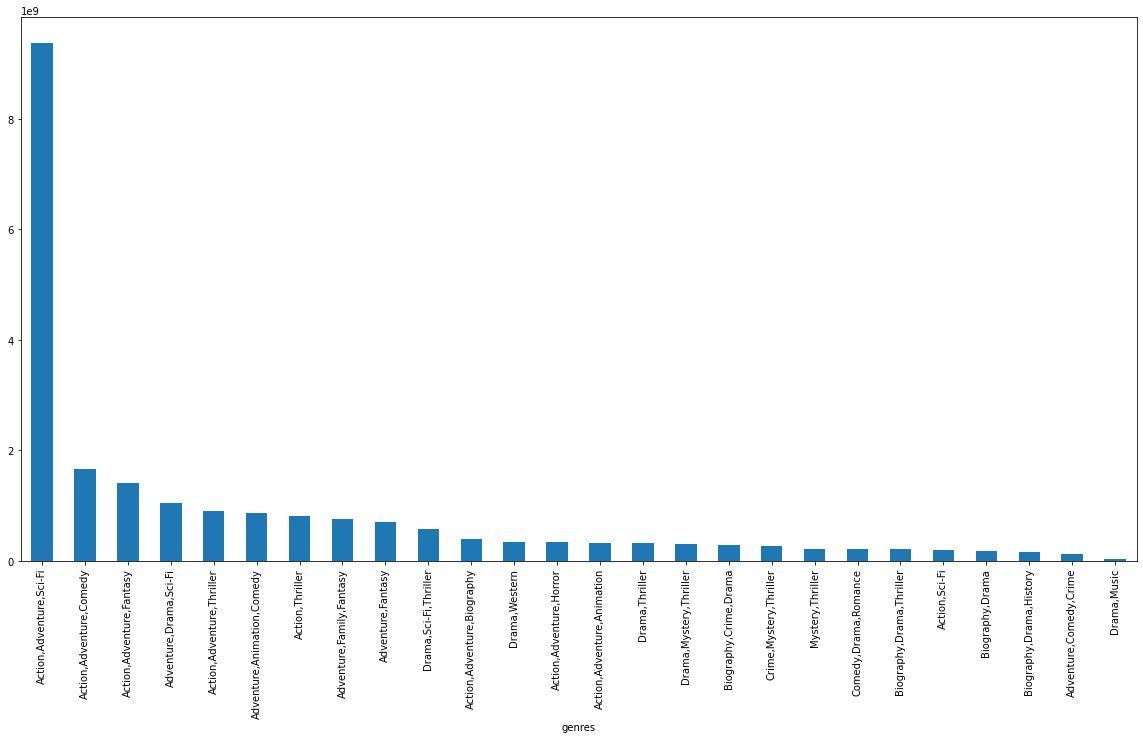

In [40]:
top_profit_genres.plot(kind='bar', x='genres', y='profit',figsize=(20,10))

# Graph Data

> Top Genres by Average Popularity

<AxesSubplot:xlabel='genres'>

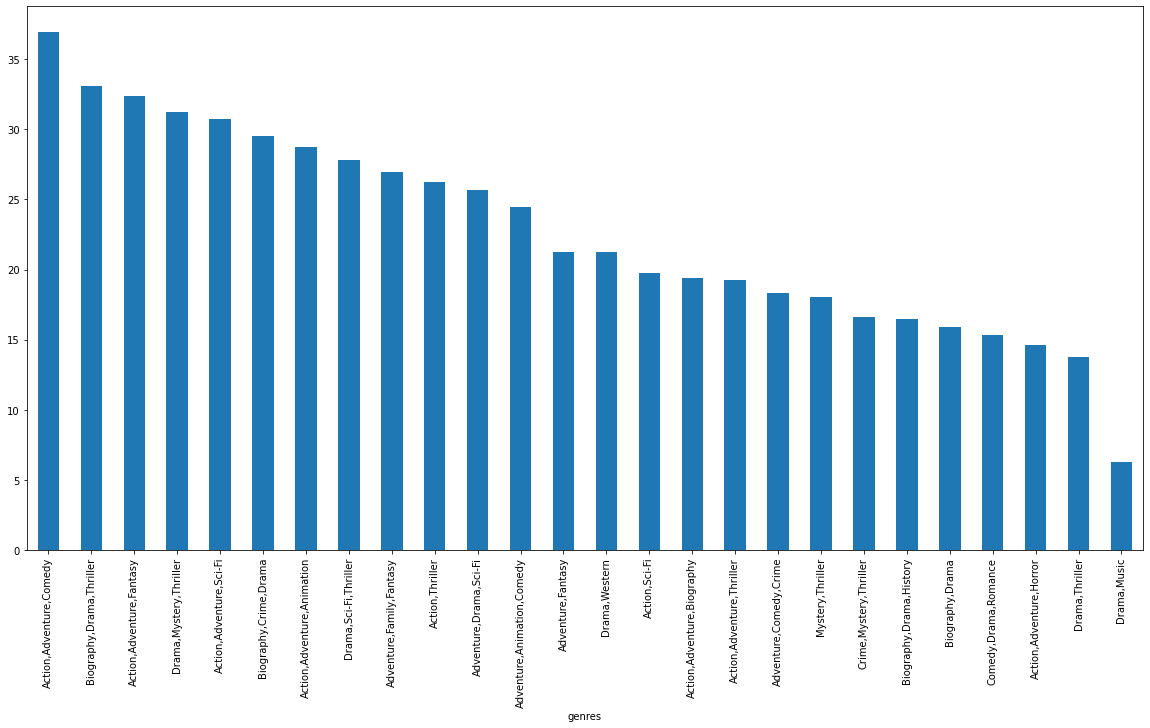

In [42]:
top_genres_popularity.plot(kind='bar',x='genres',y='popularity',figsize=(20,10))

# Graph Data

> Top Genres by Total Worldwide Gross

<AxesSubplot:xlabel='genres'>

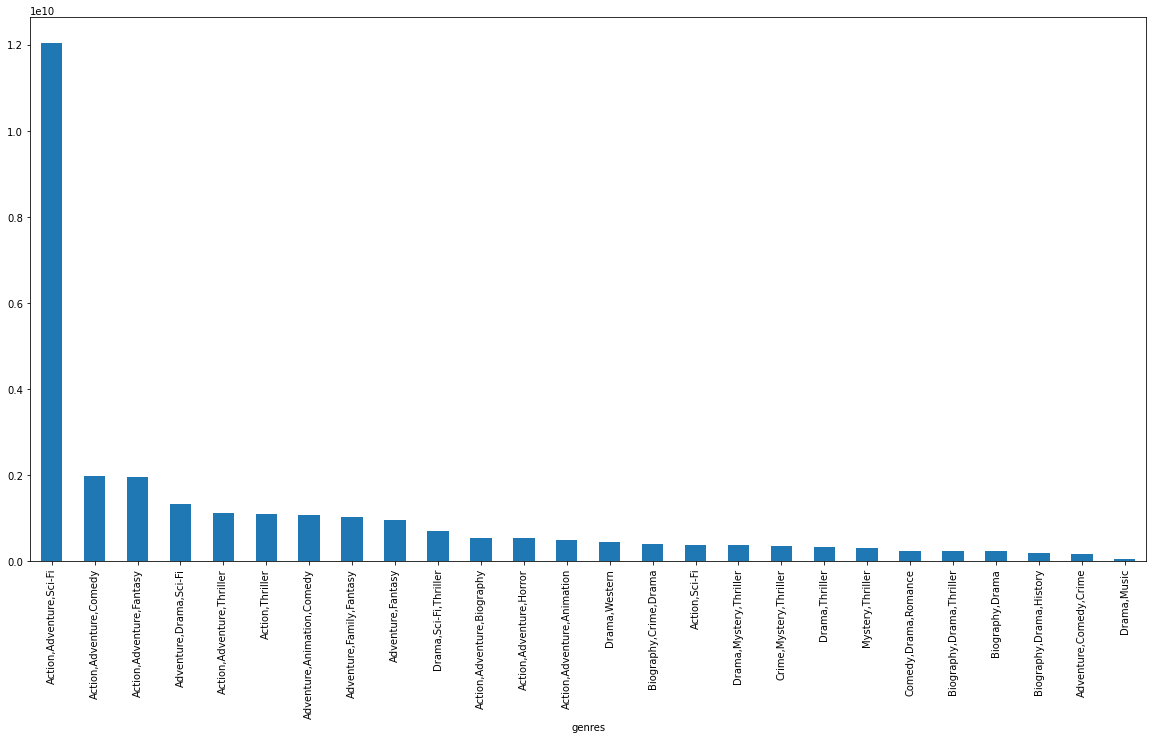

In [44]:
top_genres_gross.plot(kind='bar',x='genres',y='worldwide_gross',figsize=(20,10))

# Graph Data

> Top Genres by Average Rating

<AxesSubplot:xlabel='genres'>

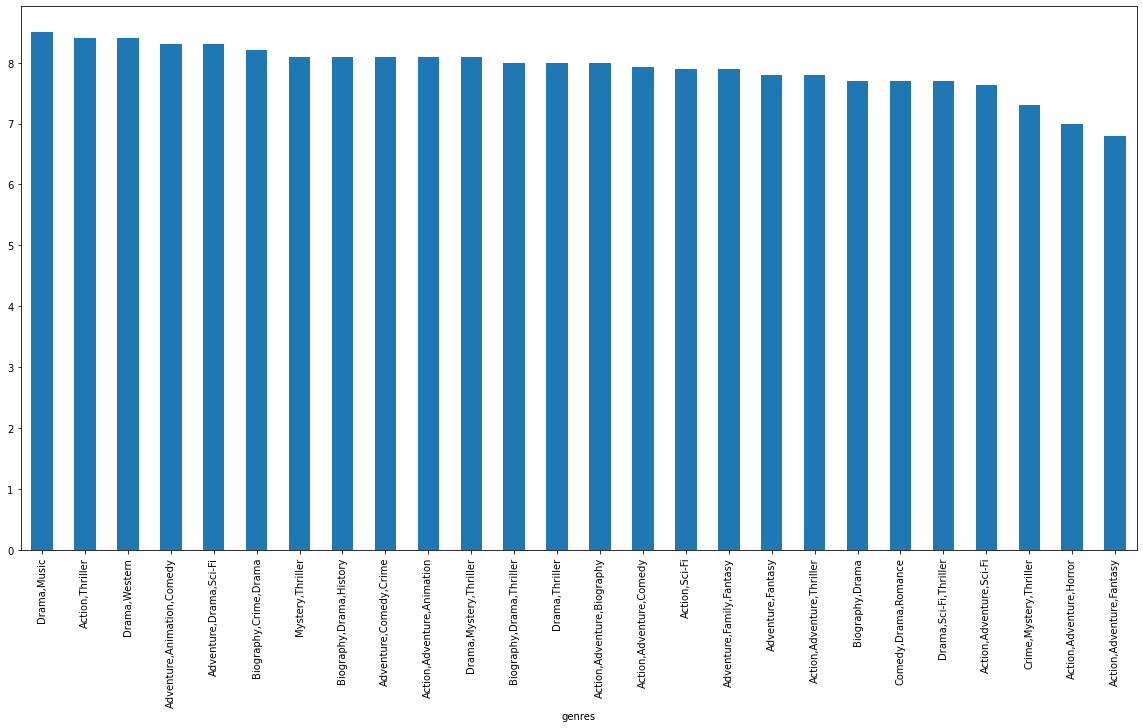

In [46]:
top_genres_rating.plot(kind='bar',x='genres',y='averagerating',figsize=(20,10))

In [47]:
def make_genre_columns(dataframe, genre_col_name='genres', drop_genres_col=True):
    '''Creates a new DataFrame of a column for each genres from the genres column. 
    Input:
        dataframe: Original DataFrame
        genres_col_name: Name of the column of genres (values look like "Action,Adventure")
        drop_genres_col: Flag to drop the original genres column
    Returns:
        A copy of the original DataFrame with a column for each genres from the genres column
    '''
    ## Get list of unique genres
    # Join all the (unique) genres values into one big string
    list_all_genres = ','.join(dataframe[genre_col_name].unique())
    # Get a set of all unique genres (no duplicates)
    unique_genres = set(list_all_genres.split(','))
    ## Create new columns with the genres & populate with 0 & 1
    # Make a safe copy
    new_dataframe = dataframe.copy(deep=True)
    for genre in unique_genres:
        new_dataframe[genre] = new_dataframe[genre_col_name].map(lambda val: 1 if genre in val else 0)
    # Drop the unused `genre_col_name` column
    if drop_genres_col:
        new_dataframe = new_dataframe.drop([genre_col_name], axis=1)
    return new_dataframe

In [48]:
df_new = make_genre_columns(df_8, "genres")
df_new.head()

,title,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,tconst,original_title,start_year,...,Thriller,History,Fantasy,Mystery,Biography,Animation,Crime,Action,Adventure,Family
1,Avengers: Infinity War,300000000,678815482,2048134200,80.773,8.3,13948,tt4154756,Avengers: Infinity War,2018,...,0,0,0,0,0,0,0,1,1,0
0,Avengers: Age of Ultron,330600000,459005868,1403013963,44.383,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,...,0,0,0,0,0,0,0,1,1,0
9,Iron Man 3,200000000,408992272,1215392272,32.093,6.9,14155,tt1300854,Iron Man Three,2013,...,0,0,0,0,0,0,0,1,1,0
10,Skyfall,200000000,304360277,1110526981,19.270,7.1,10441,tt1074638,Skyfall,2012,...,1,0,0,0,0,0,0,1,1,0
3,Captain America: Civil War,250000000,408084349,1140069413,39.137,7.4,14000,tt3498820,Captain America: Civil War,2016,...,0,0,0,0,0,0,0,1,1,0


In [55]:
genre = []
for i in df_new['Action']:
    if i == 1:
        genre.append('Action')
    else:
        print(0)
df_new['genre'] = genre
df_new

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


ValueError: Length of values (26) does not match length of index (44)